### SVM Implementation using Pegasos

## Generate Datasets

In [12]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [8]:
X, Y = make_classification(n_classes=2, n_samples=400, n_clusters_per_class=1, random_state=3, n_features=2, n_informative=2, n_redundant=0)

In [27]:
# Convert our Y-labels into {1, -1}
Y[Y==0] = -1

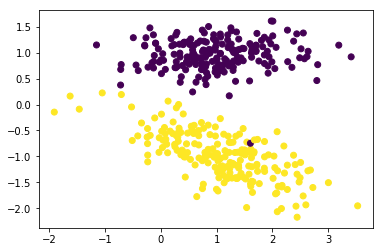

In [9]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [23]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self, W, b, X, Y):
        loss = 0.0
        m = X.shape[0]
        
        loss += 0.5*np.dot(W, W.T)
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C * max(0, (1-ti))
            
        return loss[0][0]
    
    def fit(self, X, Y, batch_size=100, learning_rate=0.001):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Initialize the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        print(self.hingeLoss(W,bias,X,Y))

In [24]:
mySVM = SVM()

In [25]:
mySVM.fit(X,Y)

400.0
